In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

In [3]:
results = {
    "A_0.92_B_0.08" : pd.read_pickle("../nas_pickle/acc_0.92_util_0.08_hl_4_10_40.pkl"),
    "A_0.96_B_0.04" : pd.read_pickle("../nas_pickle/acc_0.96_util_0.04_hl_4_10_40_redo.pkl"),
    "A_0.98_B_0.02" : pd.read_pickle("../nas_pickle/acc_0.98_util_0.02_hl_4_10_40.pkl"),
}

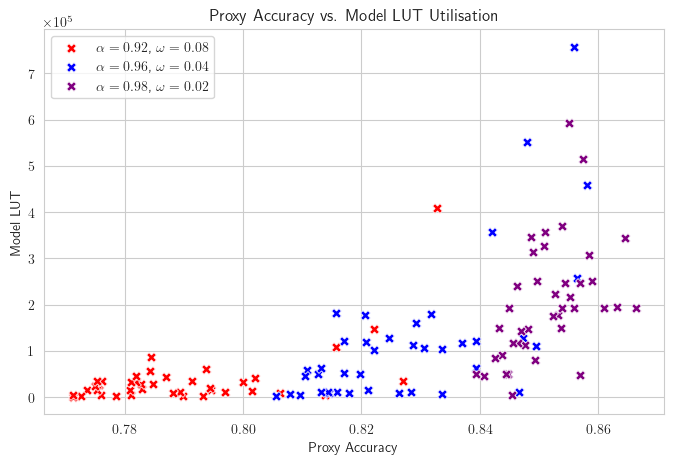

In [5]:
labels = {
    "A_0.92_B_0.08" : r"$\alpha=0.92$, $\omega=0.08$",
    "A_0.96_B_0.04" : r"$\alpha=0.96$, $\omega=0.04$",
    "A_0.98_B_0.02" : r"$\alpha=0.98$, $\omega=0.02$",
}

colours = {
    "A_0.92_B_0.08" : "red",
    "A_0.96_B_0.04" : "blue",
    "A_0.98_B_0.02" : "purple"
}

sns.set_style("whitegrid")
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'')
plt.figure(figsize=(8, 5))

for key in results.keys():
    results[key]["fitness"] = pd.to_numeric(results[key]["fitness"])
    data = results[key].groupby('hash').first().nsmallest(40, 'fitness')
    x = data["proxy_accuracy"]
    y = data["proxy_utilisation"]
    ax = sns.scatterplot(x=x, y=y, color=colours[key], label=labels[key], marker="X", s=50)

ax.set_xlabel("Proxy Accuracy")
ax.set_ylabel("Model LUT")
ax.set_title("Proxy Accuracy vs. Model LUT Utilisation")
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False, useMathText=True))
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))